In [1]:
import networkx as nx
import osmnx as ox
import pandas as pd
import geopandas as gpd

%matplotlib inline
ox.__version__

useful_tags_path = ['bridge', 'tunnel', 'oneway', 'lanes', 'ref', 'name',
                    'highway', 'maxspeed', 'service', 'access', 'area',
                    'landuse', 'width', 'est_width', 'junction', 'traffic_signals']
ox.utils.config(useful_tags_path)

# define the colors to use for different edge types
hwy_colors = {
        'motorway': 'purple',
        'trunk': 'pink',
        'primary': 'green',
        'secondary': 'yellow',
        'tertiary': 'orange',
        'unclassified': 'blue',
        'residential': 'red',
        # 'cycleway': 'skyblue',
        # 'service': 'sienna',
        # 'living street': 'lightgreen',
        # 'pedestrian': 'lightskyblue',
    }

# return edge IDs that do not match passed list of hwys
def find_edges(G, hwys):
    edges = []
    for u, v, k, data in G.edges(keys=True, data='highway'):
        check1 = isinstance(data, str) and data not in hwys
        check2 = isinstance(data, list) and all([d not in hwys for d in data])
        if check1 or check2:
            edges.append((u, v, k))
    return set(edges)


In [16]:
# you can get networks anywhere in the world
#address = "Mayfair, London, England, UK"
#address = 'Doha, Qatar'
#address = 'Brooklyn, new york'
#address = 'Los Angeles, California'
address = "Mayfair, London"
G = ox.graph_from_address(address, network_type="drive", dist=300)
#Geo = ox.geometries_from_address(address, tags={'highway': 'traffic_signals'}, dist=300)



#G = ox.graph_from_place("Qatar", network_type="drive")



/Users/khalid-alsheeb/opt/anaconda3/envs/kurf/lib/python3.10/site-packages/osmnx/utils_geo.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
/Users/khalid-alsheeb/opt/anaconda3/envs/kurf/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
/Users/khalid-alsheeb/opt/anaconda3/envs/kurf/lib/python3.10/site-packages/osmnx/utils_geo.py:374: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


In [17]:
#Geo.loc[Geo.highway == 'traffic_signals']


In [18]:
G2 = ox.add_edge_speeds(G)
G2 = ox.add_edge_travel_times(G2)
#G2 = ox.add_node_elevations() Needs google API

#list(G2.edges())
#list(G2.edges(data=True)) To get edges data

nodes, edges = ox.graph_to_gdfs(G2) #retursn a geodataFrame (nodes and edges data (just like a pandas dataframe))



In [19]:
#nodes.loc[nodes.index == 21651906]
nodes
#nodes.loc[nodes.highway == 'traffic_signals']
edges


#GeoGraph = ox.graph_from_gdfs(Geo, edges)
ox.plot_graph_folium(G2)

nodes

,y,x,street_count,highway,geometry
osmid,,,,,
108245,51.511153,-0.143281,4,NaN,POINT (-0.14328 51.51115)
108248,51.510135,-0.143004,3,NaN,POINT (-0.14300 51.51014)
108252,51.512309,-0.144469,4,NaN,POINT (-0.14447 51.51231)
108257,51.512473,-0.149368,3,NaN,POINT (-0.14937 51.51247)
108259,51.513263,-0.150925,3,NaN,POINT (-0.15092 51.51326)
...,...,...,...,...,...
5146389199,51.512312,-0.150346,3,NaN,POINT (-0.15035 51.51231)
6250290418,51.512537,-0.145767,1,NaN,POINT (-0.14577 51.51254)
6250359413,51.513528,-0.143672,3,NaN,POINT (-0.14367 51.51353)


In [20]:
#print(len(nodes), len(Geo))

len(nodes.loc[nodes.highway == 'traffic_signals'])

# print(nodes['highway'].value_counts())

# print(Geo['highway'].value_counts())

# Geo
#Geo
list(edges.iloc[0].geometry.coords)
#edges.iloc[0]

[(-0.1432806, 51.5111534),
 (-0.1433746, 51.5111111),
 (-0.1434217, 51.511092),
 (-0.1434787, 51.5110672),
 (-0.143798, 51.5109387)]

In [21]:
#pd.merge(nodes, Geo, on=['geometry'], how='inner')

In [22]:
edges

osmid lanes  \
u          v          key                                              
108245     25257058   0                                4253832     2   
108248     25257284   0                                4259139   NaN   
108252     21651907   0                                4253713   NaN   
           108245     0    [1065177547, 1065177548, 902662717]   NaN   
108257     25256623   0                              529829560     2   
...                                                        ...   ...   
5146389198 5146389195 0                              529829557   NaN   
5146389199 5146389198 0                              529829559   NaN   
6250359413 25256828   0                              302690915   NaN   
6322169814 25257273   0                                4253439   NaN   
7049006680 25256615   0                              202195797   NaN   

                                       name       highway maxspeed   length  \
u          v          key                                                     
108245     25257058   0       Bruton Street      tertiary   20 mph   43.044   
108248     25257284   0      Grafton Street  unclassified   20 mph  123.940   
108252     21651907   0    Grosvenor Street      tertiary   20 mph  244.440   
           108245     0     New Bond Street     secondary   20 mph  152.544   
108257     25256623   0        Brook Street  unclassified   20 mph   77.918   
...                                     ...           ...      ...      ...   
5146389198 5146389195 0        Brook Street  unclassified   20 mph   12.725   
5146389199 5146389198 0        Brook Street  unclassified   20 mph   16.369   
6250359413 25256828   0      Hanover Square  unclassified   20 mph   11.910   
6322169814 25257273   0          Hay's Mews   residential   20 mph   13.256   
7049006680 25256615   0       Davies Street   residential   20 mph   29.996   

                                                                    geometry  \
u          v          key                                                      
108245     25257058   0    LINESTRING (-0.14328 51.51115, -0.14337 51.511...   
108248     25257284   0    LINESTRING (-0.14300 51.51014, -0.14367 51.509...   
108252     21651907   0    LINESTRING (-0.14447 51.51231, -0.14454 51.512...   
           108245     0    LINESTRING (-0.14447 51.51231, -0.14439 51.512...   
108257     25256623   0    LINESTRING (-0.14937 51.51247, -0.14865 51.512...   
...                                                                      ...   
5146389198 5146389195 0    LINESTRING (-0.15013 51.51234, -0.15018 51.512...   
5146389199 5146389198 0    LINESTRING (-0.15035 51.51231, -0.15030 51.512...   
6250359413 25256828   0    LINESTRING (-0.14367 51.51353, -0.14360 51.513...   
6322169814 25257273   0    LINESTRING (-0.14799 51.50978, -0.14787 51.50969)   
7049006680 25256615   0    LINESTRING (-0.14858 51.51332, -0.14846 51.51306)   

                           speed_kph  travel_time oneway   ref est_width  \
u          v          key                                                  
108245     25257058   0         32.2          4.8    NaN   NaN       NaN   
108248     25257284   0         32.2         13.9    yes   NaN       NaN   
108252     21651907   0         32.2         27.3    yes   NaN       NaN   
           108245     0         32.2         17.1    yes  B406         4   
108257     25256623   0         32.2          8.7     no   NaN       NaN   
...                              ...          ...    ...   ...       ...   
5146389198 5146389195 0         32.2          1.4    yes   NaN       NaN   
5146389199 5146389198 0         32.2          1.8    yes   NaN       NaN   
6250359413 25256828   0         32.2          1.3    yes   NaN       NaN   
6322169814 25257273   0         32.2          1.5    NaN   NaN       NaN   
7049006680 25256615   0         32.2          3.4     no   NaN       NaN   

                          width access  
u          v         

In [23]:
# m = ox.plot_graph_folium(G2) #Interactive map
# m

# first plot all edges that do not appear in hwy_colors's types
G_tmp = G2.copy()
G_tmp.remove_edges_from(G.edges - find_edges(G, hwy_colors.keys()))
if len(G_tmp.edges):
    m = ox.plot_graph_folium(G_tmp, popup_attribute='highway', weight=5, color='black')

# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G2.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='highway',
                                 weight=5,
                                 color=color)
        
m


NameError: name 'm' is not defined

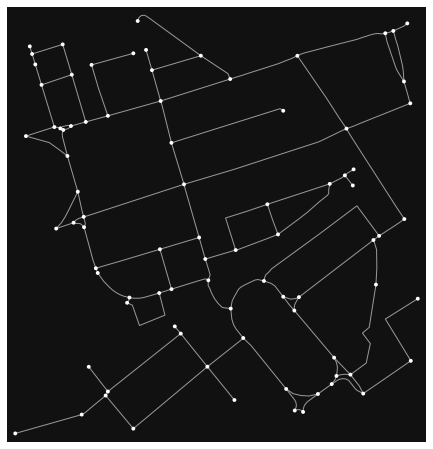

In [24]:
fig, ax = ox.plot_graph(G)

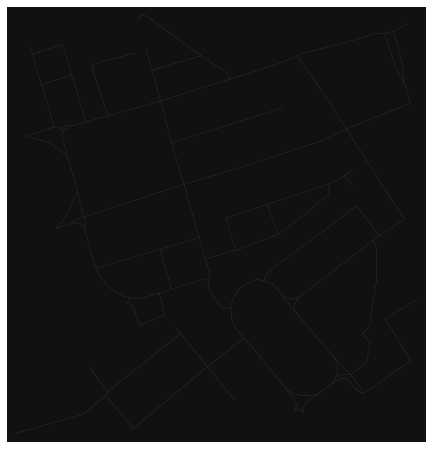

In [25]:
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.1)

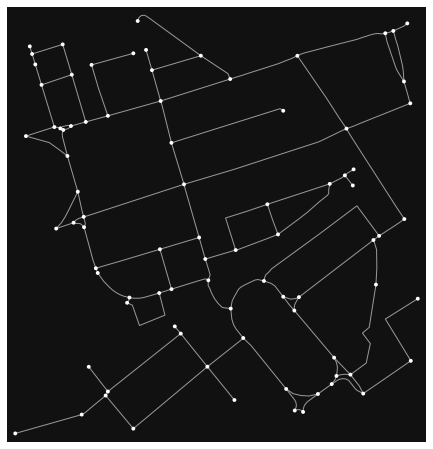

In [26]:
fig, ax = ox.plot_graph(G)

In [14]:
# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G2.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='highway',
                                 weight=5,
                                 color=color)
        
m


NameError: name 'm' is not defined

In [15]:
# first plot all edges that do not appear in hwy_colors's types
G_tmp = GeoGraph.copy()
G_tmp.remove_edges_from(G.edges - find_edges(G, hwy_colors.keys()))
#m = ox.plot_graph_folium(G_tmp, popup_attribute='highway', weight=5, color='black')

# then plot each edge type in hwy_colors one at a time
for hwy, color in hwy_colors.items():
    G_tmp = G.copy()
    G_tmp.remove_edges_from(find_edges(G_tmp, [hwy]))
    if G_tmp.edges:
        m = ox.plot_graph_folium(G_tmp,
                                 graph_map=m,
                                 popup_attribute='highway',
                                 weight=5,
                                 color=color)
        
m

NameError: name 'GeoGraph' is not defined